In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import tensorflow as tf
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from tensorflow.keras.preprocessing import sequence

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]
%config InlineBackend.figure_format = 'retina'

seed = 7
np.random.seed(seed)

In [16]:
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585
Review length: 
Mean 234.76 words (172.911495)


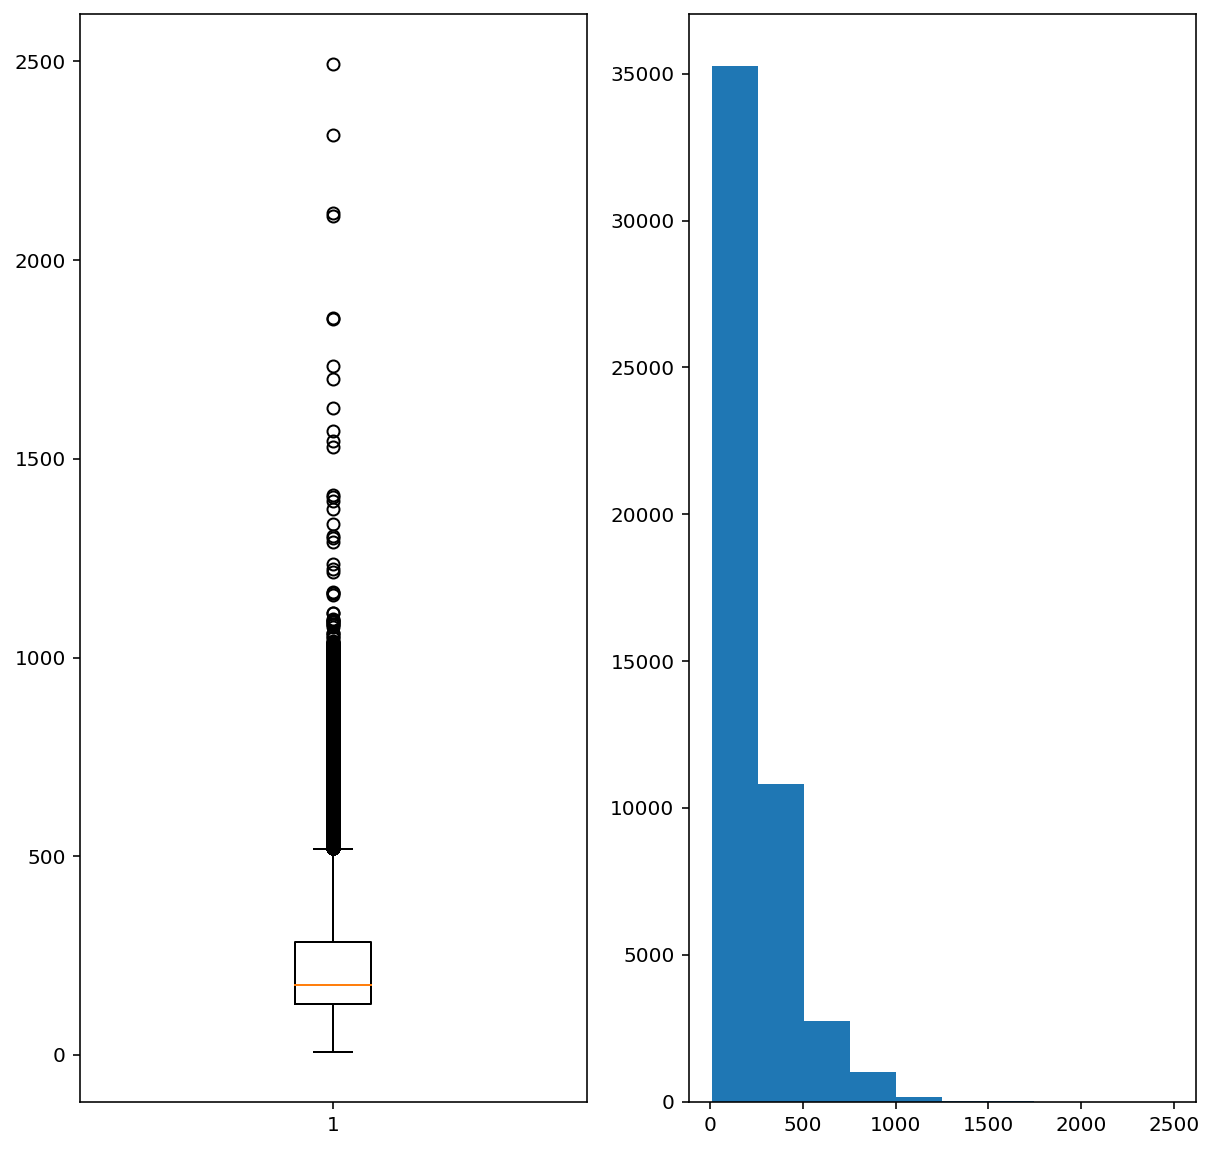

In [17]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(np.unique(y))

# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

# Summarize review length
print("Review length: ")
result = list(map(len, X))
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

# plot review length as a boxplot and histogram
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

In [18]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

In [19]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

In [20]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                                 
 dense_4 (Dense)             (None, 250)               4000250   
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - ETA: 0s - loss: 0.4604 - acc: 0.7621

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


25000/25000 [==============================] - 6s 223us/sample - loss: 0.4604 - acc: 0.7621 - val_loss: 0.2873 - val_acc: 0.8788
Epoch 2/2
25000/25000 [==============================] - 5s 215us/sample - loss: 0.1750 - acc: 0.9352 - val_loss: 0.3063 - val_acc: 0.8740
Accuracy: 87.40%
